In [9]:
from tools.data_reader import *
from tools.neural_network_integrator import *
from tools.visualization import *
from tools.eulers_method import *
from models.nn import *
from models.vae import *

%reload_ext autoreload
%autoreload 2

In [10]:
# file_path = "data/postvis.csv"
file_path = "data/postvis_200.traj"
columns, df_selected, train_data, val_data = data_reader(
    file_path, train_percentage=0.9, test_percentage=0.1
)
train_data.shape, val_data.shape, train_data[0, :, :]

startX-PID1     35.402946
endX-PID1       35.629495
simTime         62.931561
startY-PID1     17.864115
endY-PID1       18.543403
endTime-PID1    63.550685
Name: 18559, dtype: float64


((18412, 2, 3),
 (2046, 2, 3),
 array([[35.40294577, 35.62949481, 62.93156093],
        [17.86411517, 18.54340335, 63.55068529]]))

### NN + Corner Scenario

[0.         0.         0.         ... 0.         0.         0.04945168]


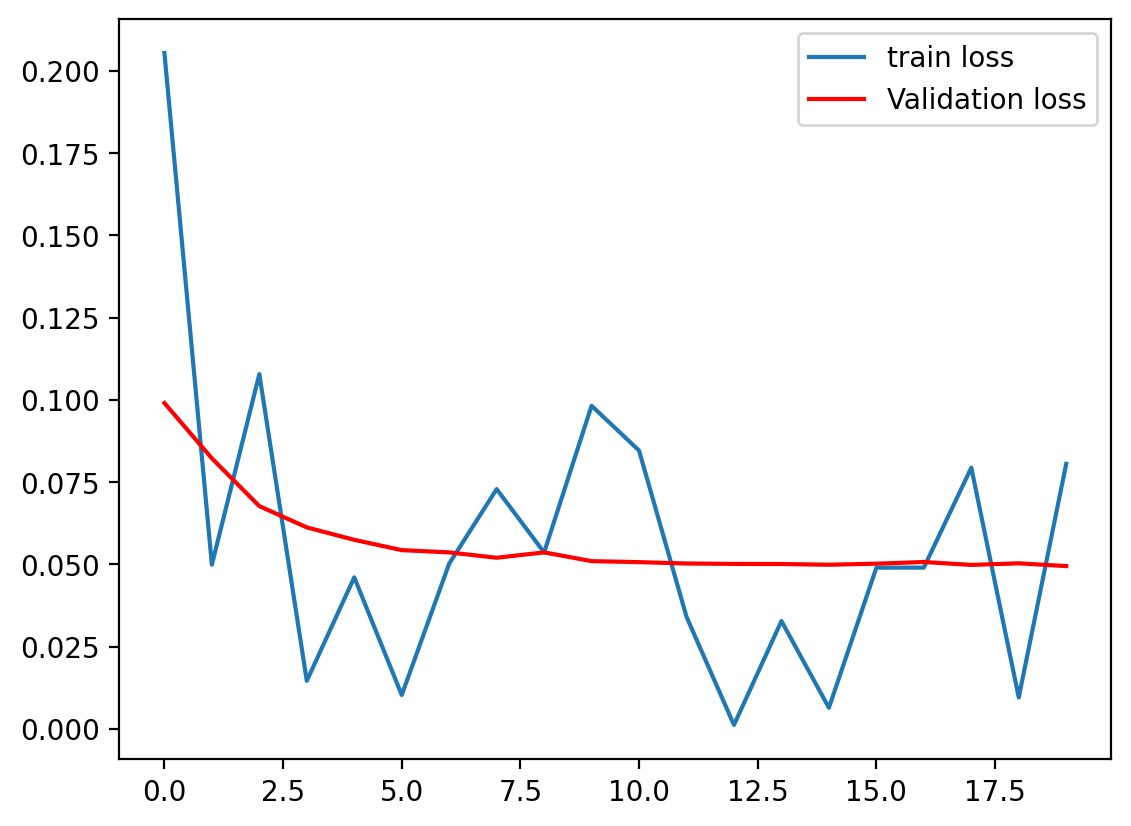

In [11]:
# parameters of neural network
lr = 0.0001
epochs = 20
batch_size = 10
width = 3
# setup the model
model = Neural_network(width=width)
# train the model
train_loss_data, val_loss_data = train(
    model,
    lr,
    epochs,
    train_data,
    val_data,
    batch_size,
    early_stopping_step=3,
    method="kutta",
)
plot_train_val_loss(train_loss_data, val_loss_data)
print(val_loss_data)

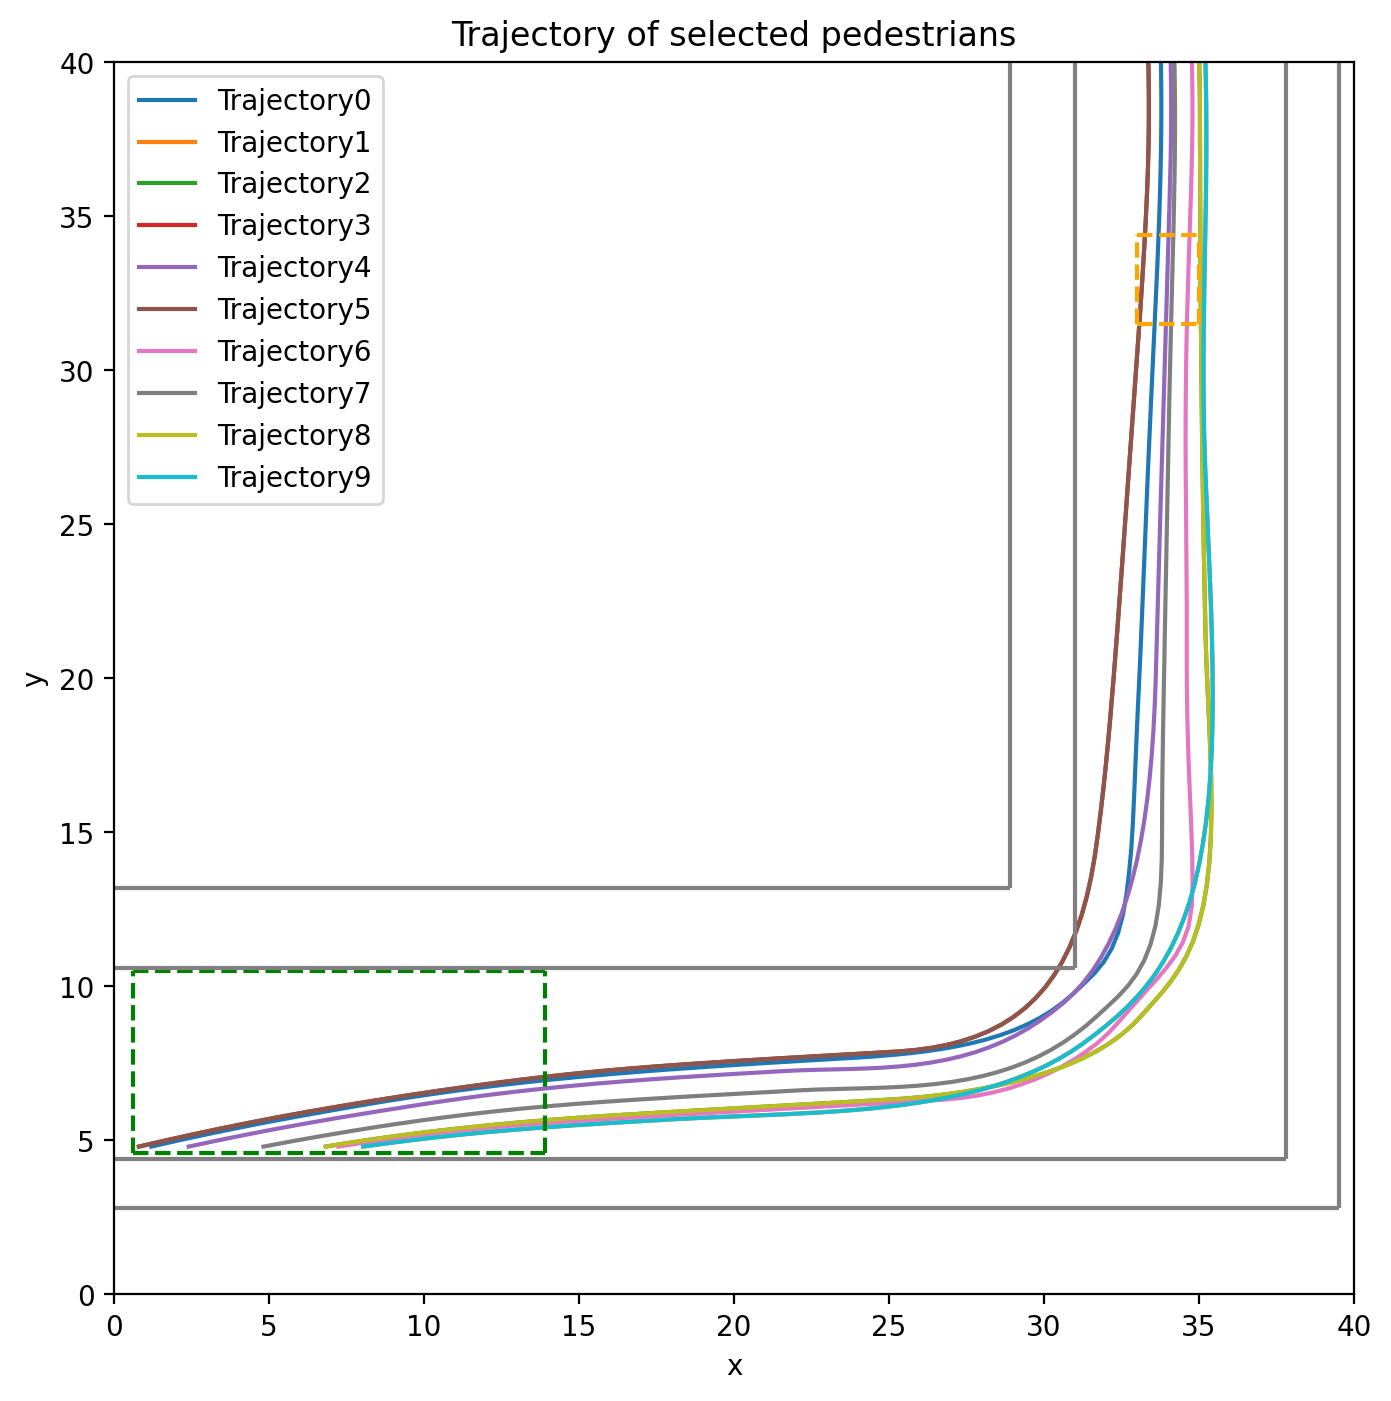

In [12]:
# simluate the trajectory
T_end = 335
num_selected_peds = 10
highest_num_ped = 20
traj = simulateRandomKutta(num_selected_peds, highest_num_ped, T_end, model, file_path)
plot_traj(num_selected_peds, traj)

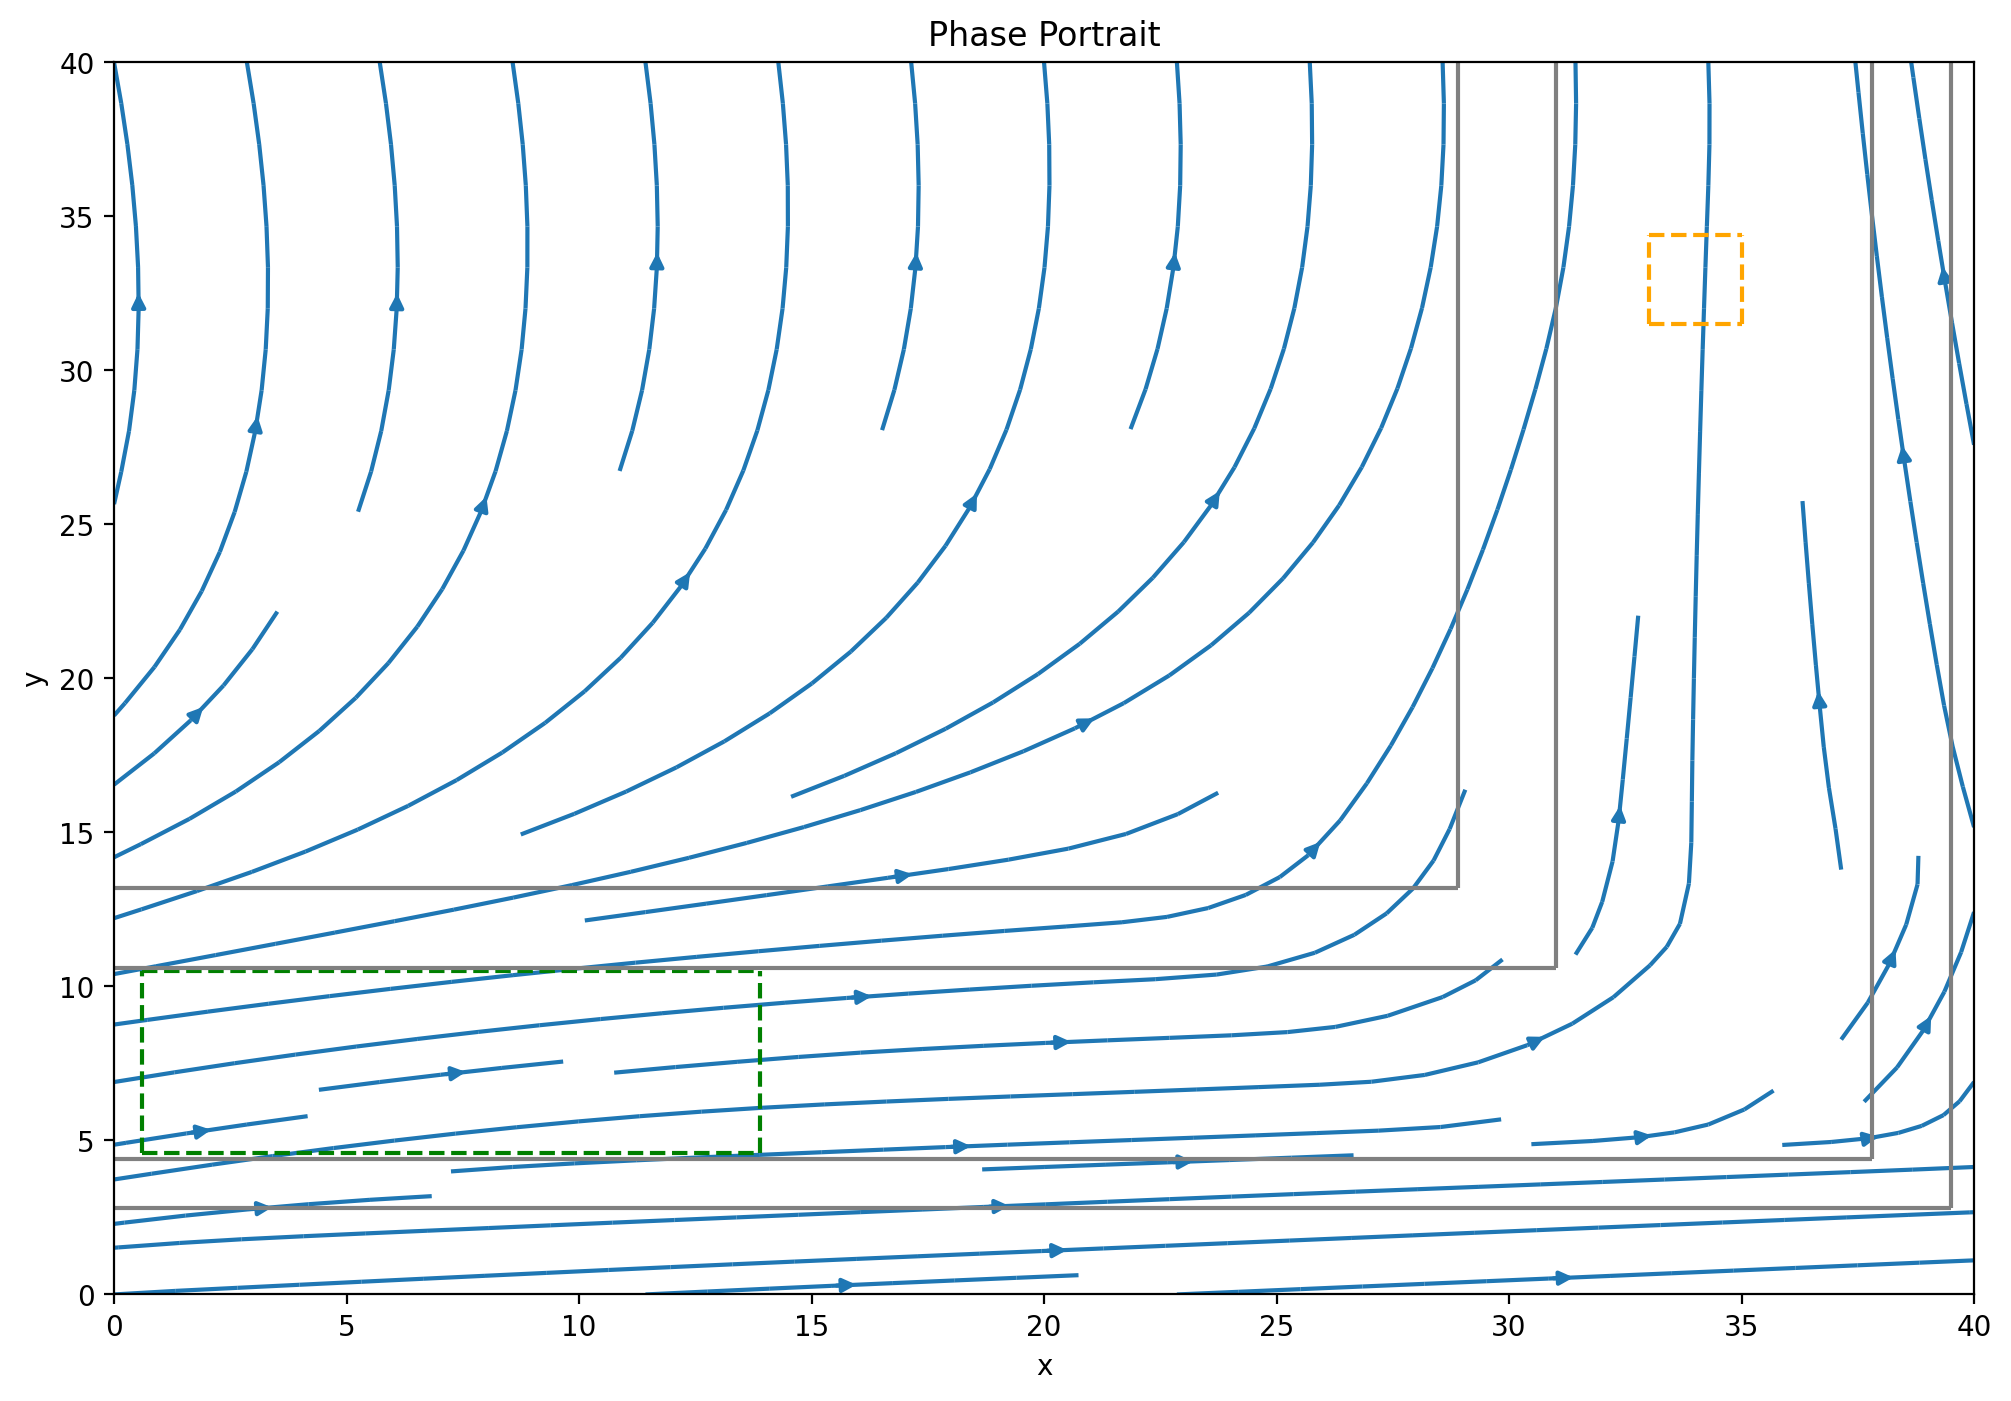

In [13]:
# plot the phase portrait
X, Y, U, V = phase_portrait(model)
plot_phase_portrait(X, Y, U, V, background="corner")

### VAE + Corner Scenario

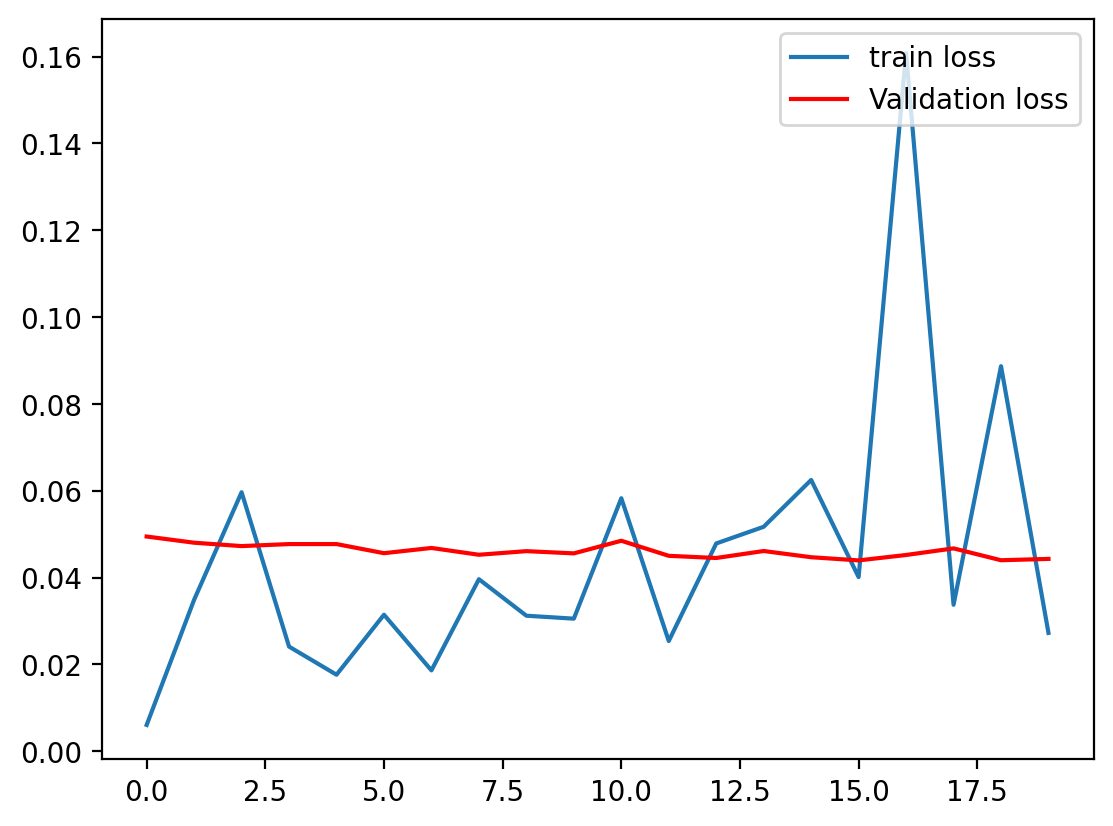

In [14]:
# parameters of neural network
lr = 0.0001
epochs = 20
batch_size = 10
width = 3
input_size = 2
output_size = 2
latent_dims = 2
# setup the model
vae = VariationalAutoencoder(latent_dims, input_size, output_size)
# train the model
train_loss_data, val_loss_data = train(
    vae,
    lr,
    epochs,
    train_data,
    val_data,
    batch_size,
    early_stopping_step=3,
    method="kutta",
)
plot_train_val_loss(train_loss_data, val_loss_data)

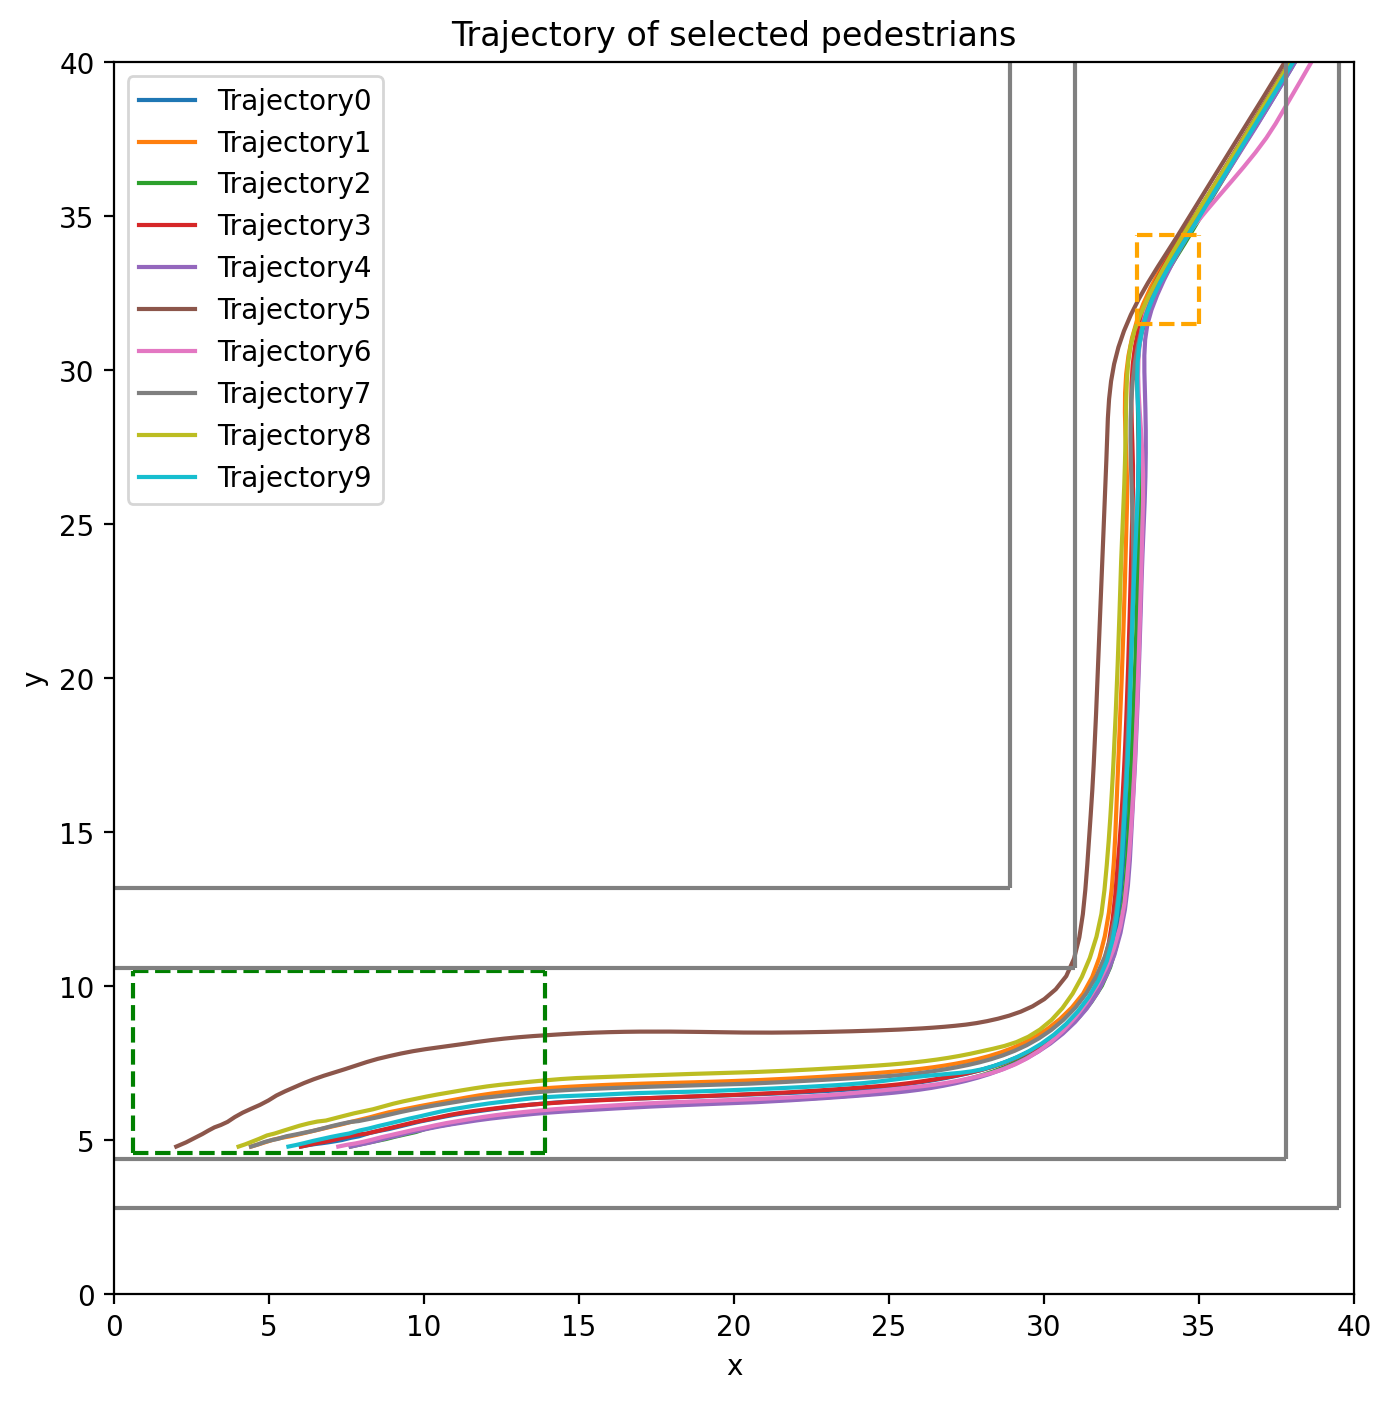

In [15]:
# simluate the trajectory
T_end = 335
num_selected_peds = 10
highest_num_ped = 20
traj = simulateRandomEuler(num_selected_peds, highest_num_ped, T_end, vae, file_path)
plot_traj(num_selected_peds, traj)

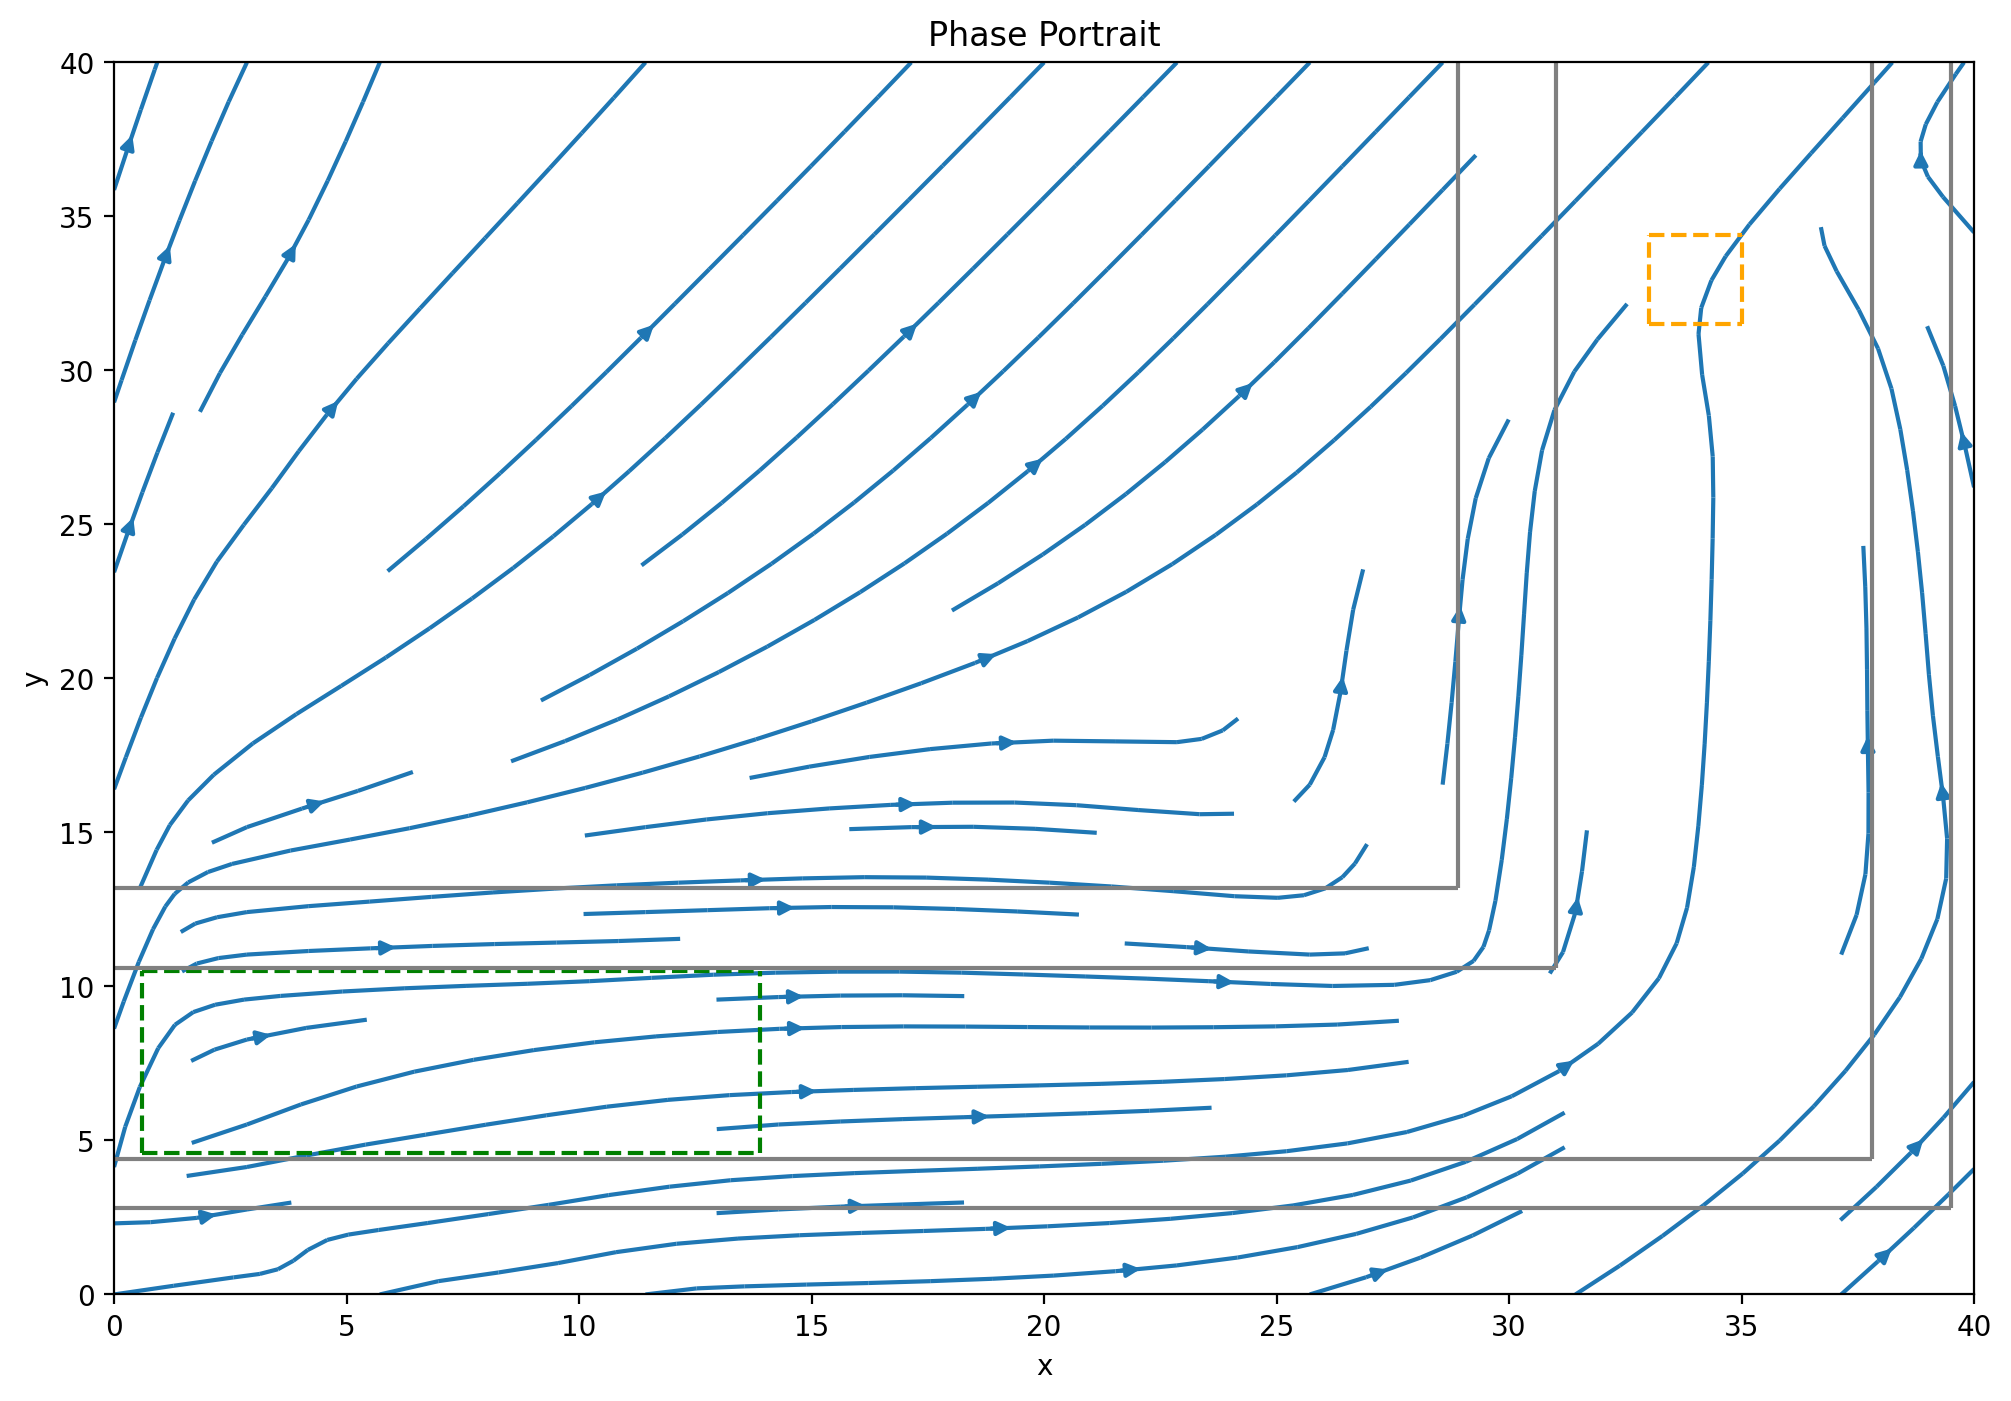

In [16]:
# plot the phase portrait
X, Y, U, V = phase_portrait(vae)
plot_phase_portrait(X, Y, U, V, background="corner")